# Class 4 数据拟合与统计分析

In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl
import plotly.graph_objs as go
init_notebook_mode()

## 4.1 线性，多项式，任意曲线拟合

### 4.1.1 scipy.linregress

In [175]:
x = np.arange(0, 10, 0.1)
y = 2 * x + np.random.normal(size=len(x)) * 1

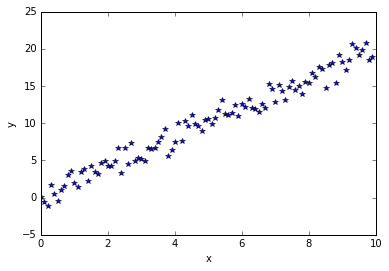

In [176]:
plt.figure(1)
plt.plot(x, y, '*')
plt.xlabel('x')
plt.ylabel('y')

In [177]:
linmodel = linregress(x, y)
print dir(linmodel)

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getslice__', '__getstate__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', 'count', 'index', 'intercept', 'pvalue', 'rvalue', 'slope', 'stderr']


In [178]:
print linmodel.intercept, linmodel.slope, linmodel.rvalue

0.265398681622 1.97358679774 0.983275541312


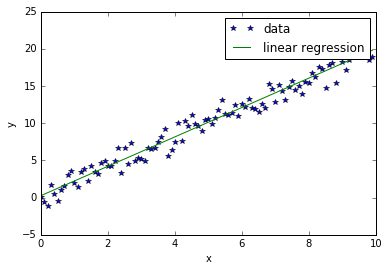

In [179]:
ybar = linmodel.intercept + x * linmodel.slope
plt.figure(2)
plt.plot(x, y, '*', label='data')
plt.plot(x, ybar, '-', label='linear regression')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### 4.1.2 np.polyfit np.poly1d

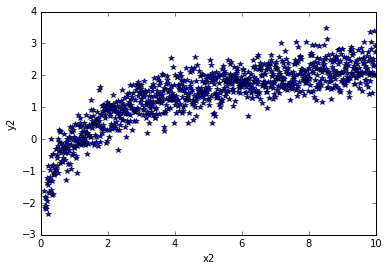

In [180]:
x2 = np.arange(0.1, 10, 0.01)
y2 = np.log(x2) + np.random.normal(size=len(x2)) * 0.4
plt.figure(3)
plt.plot(x2, y2, '*', label='data')
plt.xlabel('x2')
plt.ylabel('y2')

In [181]:
models = {}
y2bars = {}
maxpolyorder = 10
for i in [1, 2, 5, 200]:
    polyparams = np.polyfit(x2, y2, i)
    model = np.poly1d(polyparams)
    models[i] = model
    y2bar = model(x2)
    y2bars[i] = y2bar

C:\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:5: RankWarning:

Polyfit may be poorly conditioned



In [182]:
data = [go.Scatter(x=x2, y=y2, name='data', mode='markers')]
datafit = [go.Scatter(x=x2, y=y2bars[i], name='polyfit_%d'%(i), mode='line')
           for i in y2bars]
iplot((data+datafit))

### 4.1.3 scipy.optimize.curve_fit 任意指定函数拟合

In [13]:
from scipy.special import expit

input data

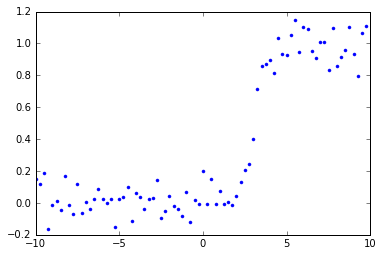

In [183]:
x3 = np.arange(-10, 10, 0.25)
y3 = np.array([ 0.14948125,  0.11984659,  0.18921343, -0.16088176, -0.01064765,
        0.01488868, -0.04717537,  0.16974028, -0.01323501, -0.06772874,
        0.11572065, -0.06317748,  0.00742708, -0.03624072,  0.02657351,
        0.08756462,  0.02304166, -0.00200206,  0.02530035, -0.15334097,
        0.02151183,  0.03894407,  0.09936698, -0.11654036,  0.06000632,
        0.03601171, -0.039076  ,  0.02695269,  0.03364085,  0.14540292,
       -0.09621186, -0.05168188,  0.04174257, -0.01798097, -0.03620175,
       -0.08413775,  0.06764167, -0.11771695,  0.02052294, -0.00736578,
        0.20082652, -0.00896195,  0.14887015, -0.00407779,  0.07358027,
       -0.00442923,  0.00338459, -0.01600744,  0.04227758,  0.12833754,
        0.20612325,  0.24501656,  0.39931091,  0.71458477,  0.85624369,
        0.87086201,  0.89697517,  0.81727747,  1.03402503,  0.93255742,
        0.9307032 ,  1.05558446,  1.14597718,  0.94891482,  1.10146987,
        1.09262066,  0.95109752,  0.90620947,  1.00863699,  1.00945614,
        0.83338845,  1.09755857,  0.85865278,  0.91646125,  0.9611761 ,
        1.10491192,  0.93116714,  0.79709965,  1.0678967 ,  1.11195429])
plt.plot(x3,y3, '.')

这个data很像一个阶梯函数，可以用三段线性函数来拟合

In [15]:
def threepiecelinear(x, a, b, v1, v2):
    """
    x < a: x= v1
    a <= x < b: x = v1 + (v2-v1)/(b-a) * (x-a)
    x >= b: x = v2
    """
    return np.where(x < a, v1, 
                    np.where(x >= b, v2, 
                             v1 + (v2-v1)/(b-a) * (x-a)))

poor fit if no p0 is giving

[('a', 1.0000000141398977), ('b', 1.0), ('v1', 0.017987484814417993), ('v2', 0.77021361356913032)]


C:\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars

C:\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in multiply



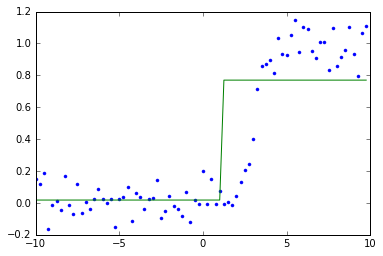

In [184]:
popt1, pcov1 = curve_fit(threepiecelinear, x3, y3) # return fit paramters and correlation matrix
optfunc1 = lambda x: threepiecelinear(x, *popt1) # get the fitted function
print zip(['a', 'b', 'v1', 'v2'], popt1)
plt.plot(x3,y3, '.', x3,optfunc1(x3), '-')

[('a', 2.1741492692391944), ('b', 3.8598430371735475), ('v1', 0.017033924557372015), ('v2', 0.97965717707619038)]


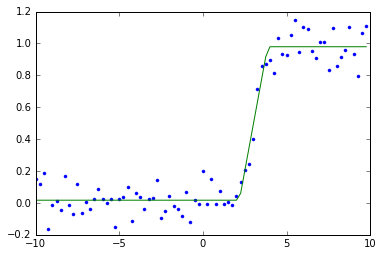

In [185]:
popt1, pcov1 = curve_fit(threepiecelinear, x3, y3, p0=[2,3,0,1]) # return fit paramters and correlation matrix
optfunc1 = lambda x: threepiecelinear(x, *popt1) # get the fitted function
print zip(['a', 'b', 'v1', 'v2'], popt1)
plt.plot(x3,y3, '.', x3,optfunc1(x3), '-')

也可考虑用sigmoid函数来拟合，更容易converge

In [186]:
def sigmoid(x, a, b, v1, v2):
    """y = v1 + (v2-v1)/(1+exp(-a*(x-b)))"""
    return v1 + (v2-v1) * expit(a*(x-b))

[('a', 3.181568701144263), ('b', 3.0483590928353603), ('v1', 0.016587356670064623), ('v2', 0.984849976097253)]


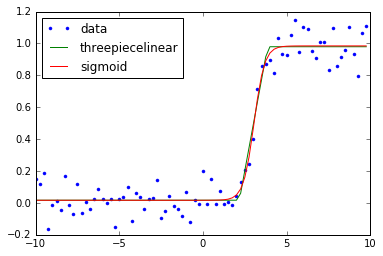

In [187]:
popt2, pcov2 = curve_fit(sigmoid, x3, y3)
optfunc2 = lambda x: sigmoid(x, *popt2)
print zip(['a', 'b', 'v1', 'v2'], popt2)
plt.plot(x3,y3, '.', x3,optfunc1(x3), 'g-', x3,optfunc2(x3), 'r-')
plt.legend(['data', 'threepiecelinear', 'sigmoid'], loc='best')

# 4.2 sk_learn statistical learning package

In [72]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [73]:
fetch_housing_data()

In [188]:
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
housing = pd.read_csv(csv_path)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [189]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [190]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [191]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [192]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [194]:
housing['ocean_proximity_numerized'] = housing_cat_encoded
housing.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  ocean_proximity_numerized  
20635          INLAND                          2  
20636          INLAND                          2  
20637          INLAND                          2  
20638          INLAND                          2  
20639          INLAND                          2

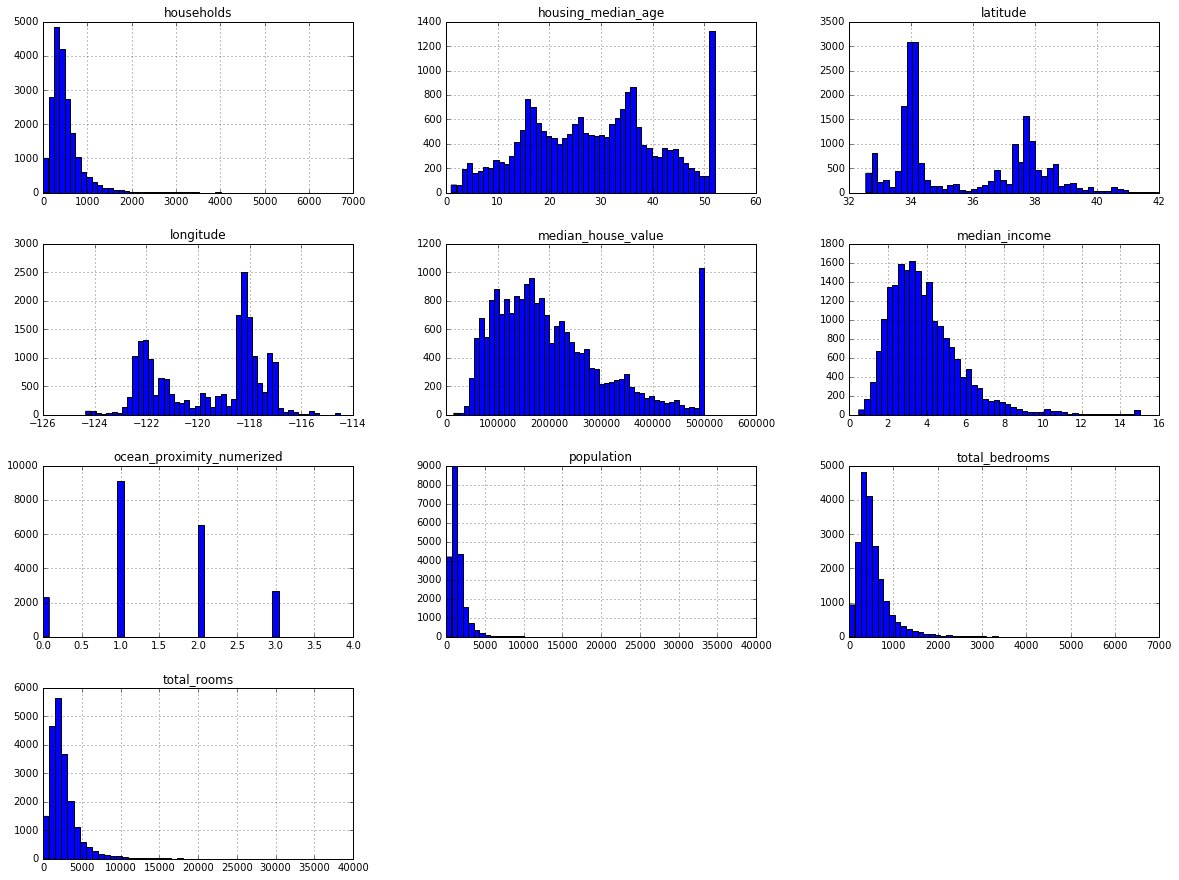

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [112]:
import sklearn
from sklearn.cross_validation import train_test_split

In [196]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [197]:
train_set_copy = train_set.copy()
train_set_copy.columns

Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
       u'total_bedrooms', u'population', u'households', u'median_income',
       u'median_house_value', u'ocean_proximity',
       u'ocean_proximity_numerized'],
      dtype='object')

In [198]:
corr_matrix = train_set_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.690647
total_rooms                  0.133989
housing_median_age           0.103706
households                   0.063714
total_bedrooms               0.047980
population                  -0.026032
longitude                   -0.046349
latitude                    -0.142983
ocean_proximity_numerized   -0.217684
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C04ADA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022641C18>]], dtype=object)

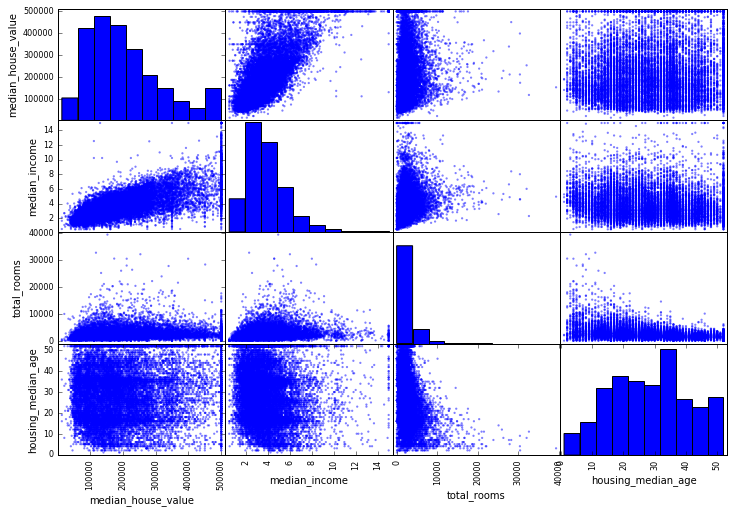

In [199]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))

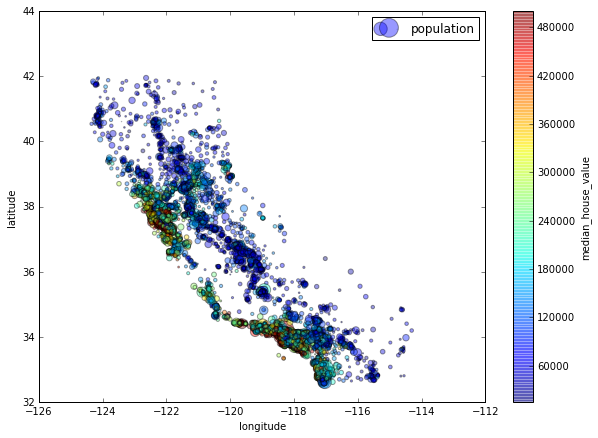

In [200]:
train_set_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

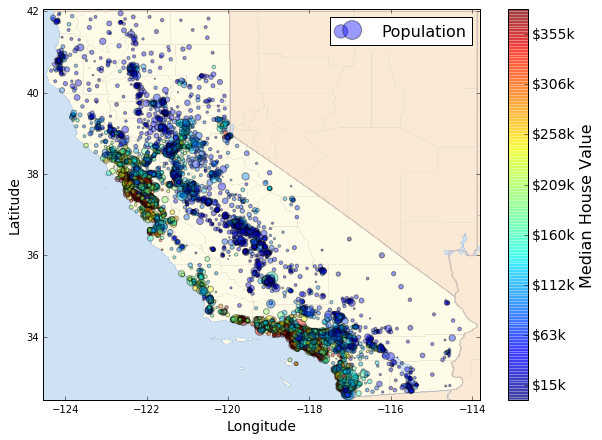

In [118]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = train_set_copy.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

In [201]:
train_set_copy.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   

      ocean_proximity  ocean_proximity_numerized  
14196      NEAR OCEAN                          3  
8267       NEAR OCEAN                          3  
17445      NEAR OCEAN                          3

In [202]:
x_train = train_set_copy.drop(['median_house_value', 'ocean_proximity'], axis=1)
y_train = train_set_copy['median_house_value']
x_test = test_set.drop(['median_house_value', 'ocean_proximity'], axis=1)
y_test = test_set['median_house_value']

In [203]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
regr.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [207]:
test_set = test_set.dropna()
x_test = test_set.drop(['median_house_value', 'ocean_proximity'], axis=1)
y_test = test_set['median_house_value']
ypredict = regr.predict(x_test)

(0, 500000.0)

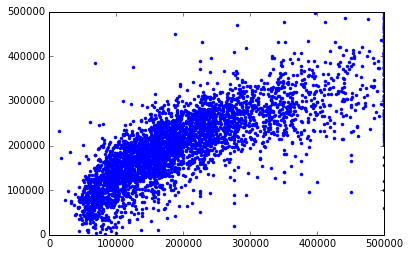

In [208]:
plt.plot(y_test, ypredict, '.')
plt.xlim([0, 5E5])
plt.ylim([0, 5E5])

In [209]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(max_depth=30, random_state=2)
regr_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [210]:
ypredict2 = regr_rf.predict(x_test)

(0, 500000.0)

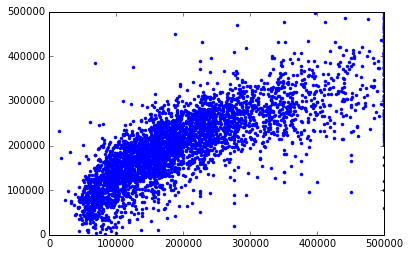

In [211]:
plt.plot(y_test, ypredict, '.')
plt.xlim([0, 5E5])
plt.ylim([0, 5E5])

## 推荐进一步阅读
Havard CS 101 统计模型的学习

Hands-on Machine Learning with Scikit-Learn and TensorFlow